| ![EEW logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/eew.jpg?raw=true) | ![EDGI logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/edgi.png?raw=true) |
|---|---|

#### This notebook is licensed under GPL 3.0. Please visit our Github repo for more information: 
#### The notebook was collaboratively authored by the Environmental Data & Governance Initiative (EDGI) following our authorship protocol: https://docs.google.com/document/d/1CtDN5ZZ4Zv70fHiBTmWkDJ9mswEipX6eCYrwicP66Xw/
#### For more information about this project, visit https://www.environmentalenforcementwatch.org/

# Watershed analysis

does this save? 

# 1. Begin! 
Here we load some helper code to get us going. If your environment already has these loaded this cell may be skipped. (If you're not sure, it's best to run this cell!)

In [ ]:
# We have a folder of chunks of reusable code that we're using across different
#  Notebooks. This step goes and gets the relevant code from that folder so we
#  can use it here. (https://github.com/edgi-govdata-archiving/ECHO_modules/)
!git clone https://github.com/edgi-govdata-archiving/ECHO_modules.git -b reorganization &>/dev/null;

# Geopandas is an open source library for working with geographic data using the
#   data structures library "pandas" (common in Python for data processing).
#   (https://geopandas.org/)
!pip install geopandas  &>/dev/null;

# Topojson is an open source library that lets us keep file sizes small when
#   working with geographic data, so the Notebooks can run faster while still
#   working with detailed shapes. (https://github.com/mattijn/topojson)
!pip install topojson &>/dev/null;

# Install rtree to enable geopandas to clip data spatially
!pip install rtree &>/dev/null;

# This code block will print a lot of data as it fetches and installs the libraries
#   Specified above. When it's done, the line below lets us know by printing "Done!"
print("Done!")

Done!


# 2. Run some stuff.
This cell must be run to bring in some utility functions.

In [ ]:
# These code blocks come from our folder (https://github.com/edgi-govdata-archiving/ECHO_modules/)
# Each of the files contains a series of function definitions. By running
#   those files here, we make the functions available in this Notebook.
%run ECHO_modules/utilities.py
%run ECHO_modules/presets.py
%run ECHO_modules/class.py
print("Done!")

Done!


# 3. Where do you want to search?
a. Run the following cell to choose which zip code(s) you want to start with. You won't need to know the HUC for your watersheds of interest - we'll find the ones that at least partially cover your zip code(s). Separate each zip code with a comma.

In [ ]:
units = show_pick_region_widget( region.value )
units

Text(value='14303', description='Zip Code:')

b. Run the cell below to choose whether you want to look at relatively big (HUC 8) or small (HUC 10) sized watersheds. HUC stands Hydrologic Unit Code.

In [ ]:
region_field = {k: v for k, v in region_field.items() if k.startswith("HUC")}
region = show_region_type_widget( region_field )
region

Dropdown(description='Region of interest:', options=('HUC8 Watersheds', 'HUC10 Watersheds'), style=Description…

# 5. Get the data!

In [ ]:
units_list = [u for u in str(units.value).split(",")] # parse commas
data = Echo(units_list, region.value, [], intersection=True, intersecting_geo="Zip Codes") # A configuration specific to this watershed notebook


        SELECT jsonb_build_object(
            'type', 'FeatureCollection', 'features', jsonb_agg(features.feature)
        )
        FROM (
            SELECT jsonb_build_object(
                'type', 'Feature','id', gid, 'geometry',
                ST_AsGeoJSON(geom)::jsonb,'properties',
                to_jsonb(inputs) - 'gid' - 'geom'
            ) feature
            FROM ( 
              
        SELECT this.* 
        FROM wbdhu10 AS this 
        JOIN tl_2019_us_zcta510 AS other 
        ON other.zcta5ce10 IN ('14303') 
        AND ST_Intersects(this.geom,other.geom) 
            ) inputs
        ) features;
      
http://portal.gss.stonybrook.edu/echoepa/index2.php?query=%0A++++++++SELECT+jsonb_build_object%28%0A++++++++++++%27type%27%2C+%27FeatureCollection%27%2C+%27features%27%2C+jsonb_agg%28features.feature%29%0A++++++++%29%0A++++++++FROM+%28%0A++++++++++++SELECT+jsonb_build_object%28%0A++++++++++++++++%27type%27%2C+%27Feature%27%2C%27id%27%2C+gid%2C+%27geometry%27%2C%0A

# 6. Show me the data! 
First, let's look at all the facilities regulated under the Clean Water Act in this area.

In [ ]:
data.show_facility_map()

show fac map


Here's the top 20 violators of the Clean Water Act over the past few years:

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


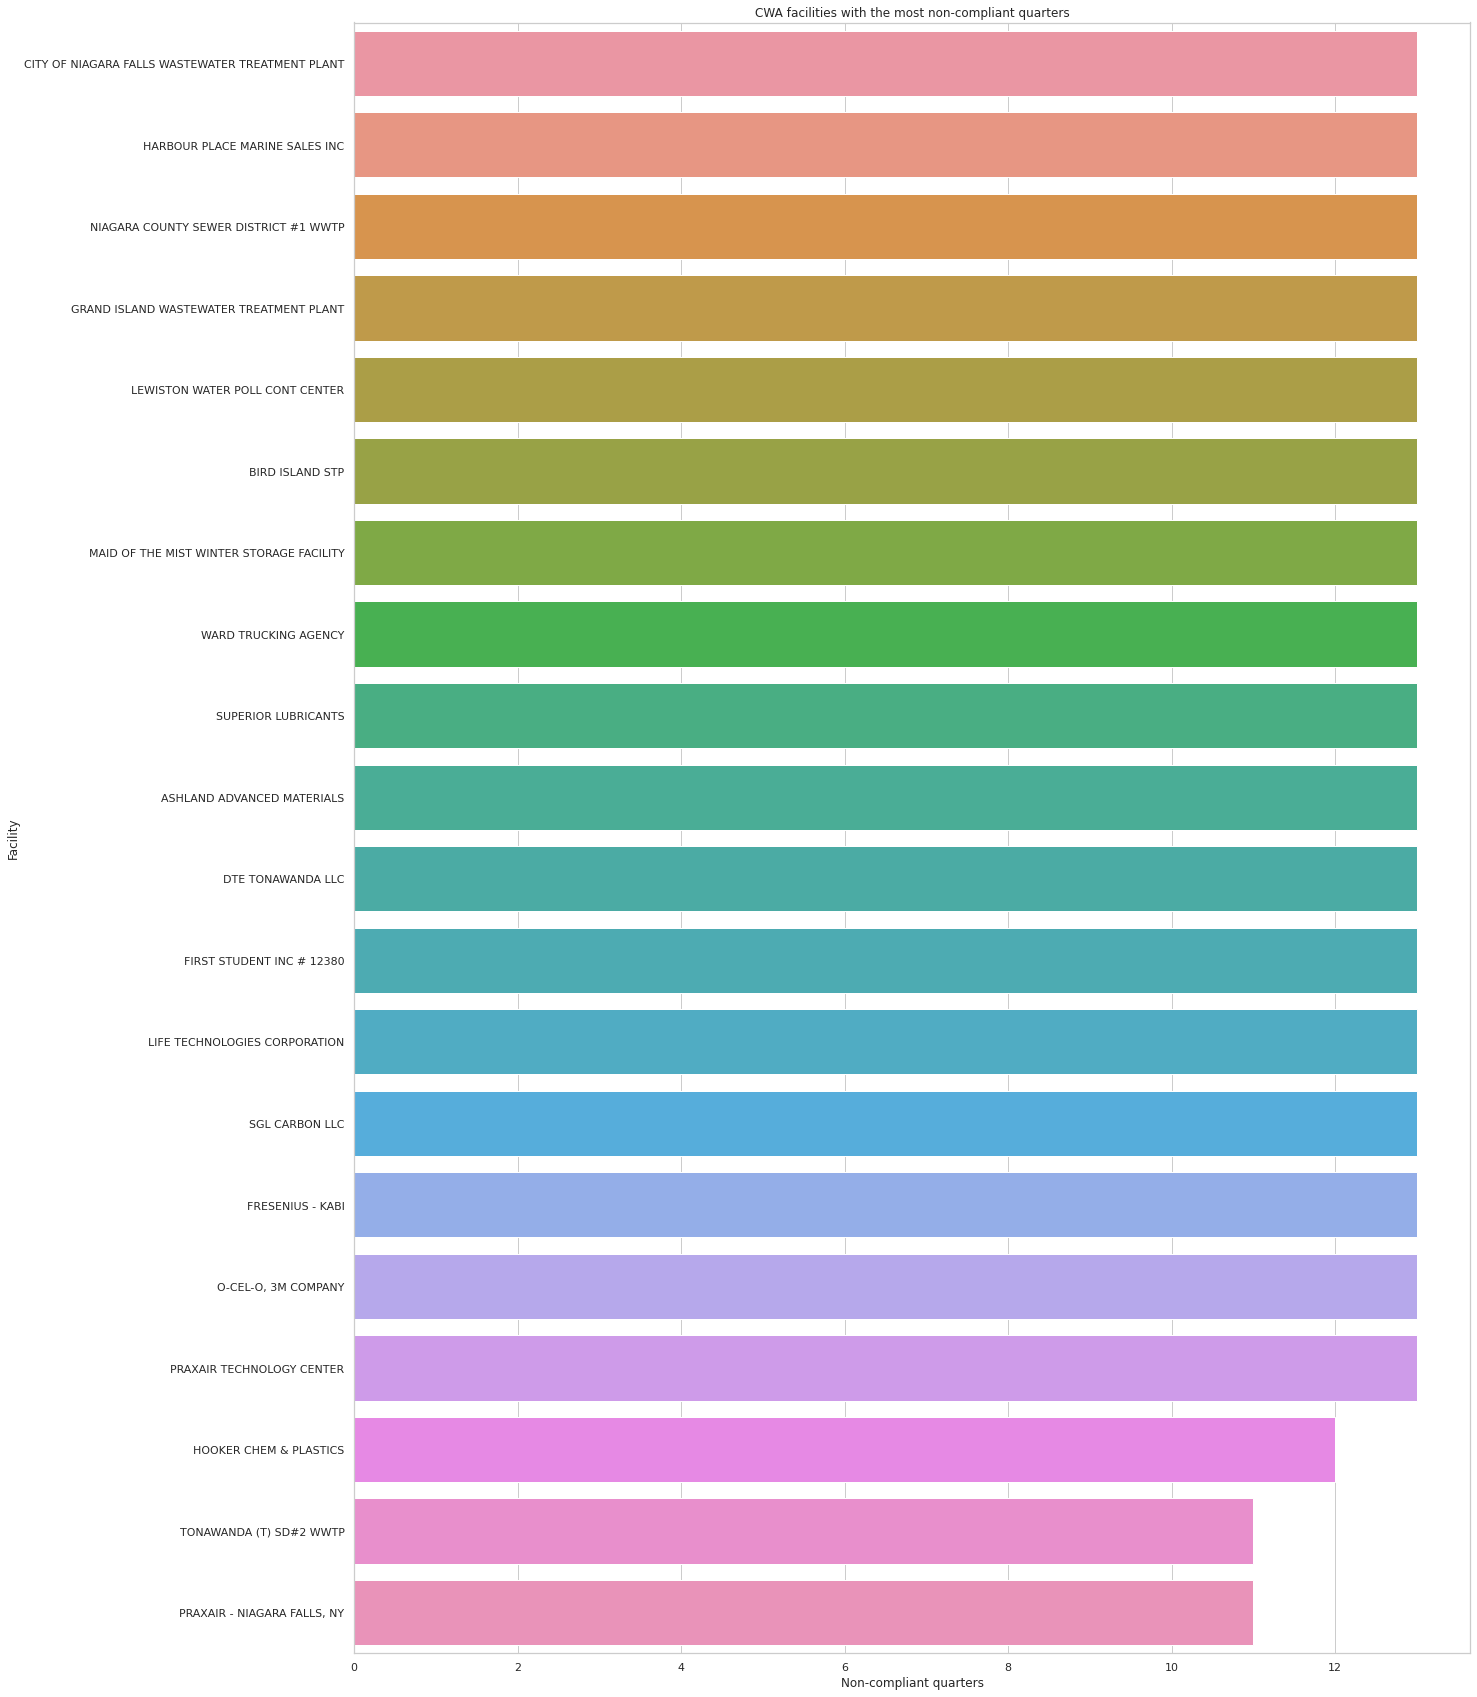

In [ ]:
data.show_top_violators("CWA", 20)

# 7. Explore!
a. Select a program of interest and what you want to do - map it or chart it or show the table. You can run this as many times as you want! Change your selection here then re-run 7b below.

Some more detail about available data / EPA programs:

**Water** (National Pollutant Discharge Elimination System, or NPDES):
- NPDES_QNCR_HISTORY = CWA Quarterly Non-Compliance History
- NPDES_INSPECTIONS = CWA Inspections
- NPDES_FORMAL_ENFORCEMENT_ACTIONS = CWA Enforcements
- NPDES_EFF_VIOLATIONS = Effluent Violations
- NPDES_DMRS_FY2020 = 2020 Discharge Monitoring

Here's where you can find definitions of terms used in the columns of Clean Water Act data: https://echo.epa.gov/tools/data-downloads/icis-npdes-download-summary

In [ ]:
data_sets = {k: v for k, v in attribute_tables.items() if v['echo_type'] == "NPDES"}

explore = show_data_set_widget( data_sets ) 
visualization = widgets.ToggleButtons(
    options=['Map', 'Chart', 'Table'],
    description='Visualization:',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Show a map of facilities', 'Chart data over time', 'Show '],
)
display(explore)
display(visualization)

SelectMultiple(description='Data sets:', options=('CWA Violations', 'CWA Inspections', 'CWA Penalties', '2020 …

ToggleButtons(button_style='success', description='Visualization:', options=('Map', 'Chart', 'Table'), tooltip…

b. Map, chart, or show a table of the program of interest

In [ ]:
program = explore.value[0]

data.add(program)

if visualization.value == "Map":
  data.show_program_map(program)
elif visualization.value == "Chart":
  data.show_chart(program)
elif visualization.value == "Table":
  data.show_data(program)

This data has already added!


c. In this cell you may save the program data for your region to your computer.
To access your files click on the 'Files' tab in the menu on the left-hand side of the notebook (it looks like a folder). You may have to hit 'Refresh' if you don't see your file. Then, you can click on the ... next to your file and choose "Download". The CSV spreadsheet will download to wherever your browser usually saves files (e.g. Downloads folder)

In [ ]:
if ( len( data.results[program] ) > 0 ):
  write_dataset( df=data.results[program], base=program, type=region.value, state="", region=region.value )
else:
  print( "There is no data for this program and region." )

Wrote CSVs/2020 Discharge Monitoring--HUC10 Watersheds-HUC10 Watersheds.csv


# 8. Looking at Discharge Monitoring Reports
a. Let's see what facilities have reported polluting. You can select specific facilities and/or specific pollutants

In [ ]:
dmr_toggle = widgets.SelectMultiple(
    options=['Facilities', 'Pollutants'],
    description='Selection:',
    disabled=False
)
display(dmr_toggle)

SelectMultiple(description='Selection:', options=('Facilities', 'Pollutants'), value=())

b. Select the specific facilities and/or pollutants


In [ ]:
data.add("2020 Discharge Monitoring") # Adds the requisite data if it's not already added

facility_list = list(data.results["2020 Discharge Monitoring"][ 'FAC_NAME' ].unique())
facility_list.sort()
facility_widget = widgets.SelectMultiple(
    options = facility_list,
    description='Facility:',
    disabled=False,
)
display(facility_widget)
param_list = list(data.results["2020 Discharge Monitoring"][ 'PARAMETER_DESC' ].unique())
param_list.sort()
param_widget = widgets.SelectMultiple(
    options = param_list,
    description = 'Parameter:',
    disabled = False
)
display(param_widget)
display(visualization)

This data has already added!


SelectMultiple(description='Facility:', options=('A. DUIE PYLE COMPANIES', 'ABF TERMINAL 026', 'ALLIED WASTE N…

SelectMultiple(description='Parameter:', options=('.alpha.-BHC', '.alpha.-Endosulfan', '.beta.-BHC', '.delta.-…

ToggleButtons(button_style='success', description='Visualization:', options=('Map', 'Chart', 'Table'), tooltip…

c. Show the data

In [ ]:
data.results["2020 DMR Filtered"] = data.results["2020 Discharge Monitoring"]

if (len(facility_widget.value) == 0): # if no facilities actually selected, select all
  facility_widget.value = facility_list
if (len(param_widget.value) == 0): # if no parameters actually selected, select all
  param_widget.value = param_list
data.results["2020 DMR Filtered"] = data.results["2020 DMR Filtered"].loc[(
    data.results["2020 DMR Filtered"][ 'FAC_NAME' ].isin(facility_widget.value) & 
    data.results["2020 DMR Filtered"][ 'PARAMETER_DESC' ].isin(param_widget.value))]

# Create a custom-named program table "2020 DMR Filtered" for the Echo class based on the 2020 Discharge Monitoring table
presets.attribute_tables["2020 DMR Filtered"] = presets.attribute_tables["2020 Discharge Monitoring"]

if visualization.value == "Map":
  data.show_program_map("2020 DMR Filtered")
elif visualization.value == "Chart":
  data.show_chart("2020 DMR Filtered")
elif visualization.value == "Table":
  data.show_data("2020 DMR Filtered")

# Appendix: Other Use Cases

In [ ]:
#Map facilities in multiple watersheds
#this_watersheds = Echo(["07080208", "07080105"], "HUC8 Watersheds")

#this_watersheds.add("CWA Penalties")
#this_watersheds.show_program_map("CWA Penalties")
#this_watersheds.show_chart("CWA Penalties")

#this_watersheds.add("CWA Violations")
#this_watersheds.show_program_map("CWA Violations")
#this_watersheds.show_chart("CWA Violations")

# Multiple zip codes show map
#zips = Echo([14303,14207,14219], "Zip Codes", ["CWA Violations"])
#zips.show_facility_map()

# Huc(s) that intersect with zipcodes
#hucs = Echo([14303,14207,14219], "HUC10 Watersheds", ["CWA Violations"], intersection=True, intersecting_geo="Zip Codes")
#huc = Echo([14303], "HUC10 Watersheds", ["CWA Violations"], intersection=True, intersecting_geo="Zip Codes")
# Read this as, get the HUC10 watersheds and their CWA violations that intersect with this/these zip code/s
#huc.show_program_map("CWA Violations")
#huc.show_top_violators("CWA", 20)

"""
Zips of interest
14303 (Niagara Falls along the Niagara River – industrial corridor ) = 04270101
14207 (Black Rock/Scajaquada Creek) = 04270101
14219 (South towns, Woodlawn Beach) = '04120103', '04260000' (Lake Erie?)
"""

# Getting no program data at first and then adding Effluent Violations
zip = Echo(['02150'], "Zip Codes")
zip.add("Effluent Violations")
zip.show_data("Effluent Violations")


        SELECT jsonb_build_object(
            'type', 'FeatureCollection', 'features', jsonb_agg(features.feature)
        )
        FROM (
            SELECT jsonb_build_object(
                'type', 'Feature','id', gid, 'geometry',
                ST_AsGeoJSON(geom)::jsonb,'properties',
                to_jsonb(inputs) - 'gid' - 'geom'
            ) feature
            FROM ( 
              
      SELECT * 
      FROM tl_2019_us_zcta510
      WHERE zcta5ce10 IN ('02150')
            ) inputs
        ) features;
      
http://portal.gss.stonybrook.edu/echoepa/index2.php?query=%0A++++++++SELECT+jsonb_build_object%28%0A++++++++++++%27type%27%2C+%27FeatureCollection%27%2C+%27features%27%2C+jsonb_agg%28features.feature%29%0A++++++++%29%0A++++++++FROM+%28%0A++++++++++++SELECT+jsonb_build_object%28%0A++++++++++++++++%27type%27%2C+%27Feature%27%2C%27id%27%2C+gid%2C+%27geometry%27%2C%0A++++++++++++++++ST_AsGeoJSON%28geom%29%3A%3Ajsonb%2C%27properties%27%2C%0A++++++++++++++++to_jsonb%28inp

KeyboardInterrupt: ignored